In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# Scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할
from sklearn.model_selection import train_test_split

# 의사결정나무
from sklearn.tree import DecisionTreeClassifier

# 그래디언트부스팅
from sklearn.ensemble import GradientBoostingClassifier

# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# SVM
from sklearn.svm import SVC

#KNN
from sklearn.neighbors import KNeighborsClassifier

# 평가함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

# column counter
from collections import Counter
import graphviz

from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import os

In [2]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

In [3]:
import warnings

warnings.filterwarnings("ignore")

# 데이터 불러오기

In [4]:
df_raw= pd.read_csv("../data/BigData/유방암.csv")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 no

In [6]:
df_raw['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [7]:
df_raw_x = df_raw.drop("diagnosis",axis=1)
df_raw_y = df_raw['diagnosis']

In [47]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

결측치는 존재하지 않는다.

**변수들에 대한 설명이 따로 존재하지 않기 때문에 <span style="color:red">이상치를 판단할 수 없으므로</span> 처리하지 않았습니다**

#### 데이터 나누기
train : valid : test = 4 : 3 : 3

In [8]:
# test와 (valid, train)
df_temp_x, df_test_x, df_temp_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1220)

# valid, train
df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(df_temp_x, df_temp_y, test_size=3/7, random_state=926)


print("train size is {}".format(df_train_x.shape))
print("train y size is {}".format(df_train_y.shape))
print("valid size is {}".format(df_valid_x.shape))
print("valid y size is {}".format(df_valid_y.shape))
print("test size is {}".format(df_test_x.shape))
print("test y size is {}".format(df_test_y.shape))


train size is (227, 30)
train y size is (227,)
valid size is (171, 30)
valid y size is (171,)
test size is (171, 30)
test y size is (171,)


#  1) 랜덤 포레스트

### Default Classifier 생성

In [9]:
tree_uncustomized =  RandomForestClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on validation set : {:.3f}".format(tree_uncustomized.score(df_valid_x, df_valid_y)))

Accuracy on training set : 0.991
Accuracy on validation set : 0.930


##### n_estimator 정하기

In [10]:
train_accuracy =[]; test_accuracy=[]

para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    tree=RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators']=para_n_tree
df_accuracy_n['Train Accuracy']=train_accuracy
df_accuracy_n['Validation Accuracy']=test_accuracy

df_accuracy_n.round(3)

,n_estimators,Train Accuracy,Validation Accuracy
0,10,0.991,0.930
1,20,0.996,0.936
2,30,1.000,0.947
3,40,1.000,0.947
4,50,1.000,0.953
5,60,1.000,0.959
6,70,1.000,0.959
7,80,1.000,0.959
8,90,1.000,0.953
9,100,1.000,0.953


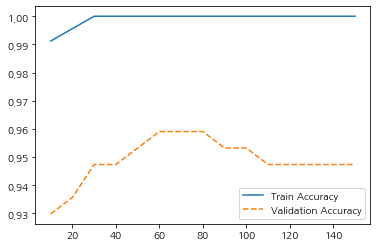

In [11]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

**n_estimators : 트리 수 변경에 따른 모델 oob error 변화**

In [12]:
oob_error=[]

for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

Text(0.5, 0, 'n_estimators')

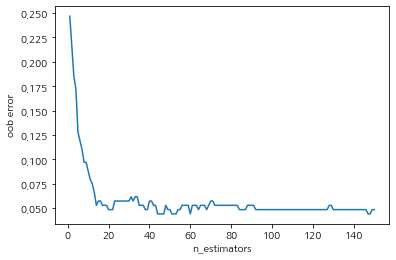

In [13]:
plt.plot(range(1,151), oob_error)
plt.ylabel("oob error")
plt.xlabel('n_estimators')


    생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가하며 OOB(Out of Bag) Error는 감소, n_estimators가 60일때 train과 test 둘다 안정된 값을 갖고 있는 걸 볼 수 있다.
    따라서 모델의 특성을 고려하여 60을 선택 (전체 데이터의 수가 569개)

In [14]:
n_estimators=60

##### Depth 정하기

In [15]:
train_accuracy =[]; test_accuracy=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=RandomForestClassifier(n_estimators=n_estimators,max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['Train Accuracy']=train_accuracy
df_accuracy_depth['Validation Accuracy']=test_accuracy

df_accuracy_depth.round(3)

,Depth,Train Accuracy,Validation Accuracy
0,1,0.952,0.918
1,2,0.978,0.918
2,3,0.987,0.936
3,4,0.991,0.953
4,5,0.996,0.965
5,6,0.996,0.953
6,7,1.000,0.959
7,8,1.000,0.959
8,9,1.000,0.959
9,10,1.000,0.959


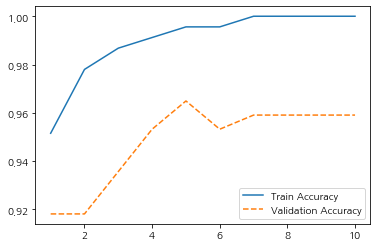

In [16]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

    최대 깊이 증가에 따라 모델의 정확도는 증가하며 Train/Test 데이터의 성능 변화를 고려하여 7 선택

In [17]:
max_depth=7

##### min_samples_split 정하기

In [18]:
train_accuracy =[]; test_accuracy=[]

para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                min_samples_split=v_min_samples_split,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['Split']=para_split
df_accuracy_split['Train Accuracy']=train_accuracy
df_accuracy_split['Validation Accuracy']=test_accuracy

df_accuracy_split.round(3)

,Split,Train Accuracy,Validation Accuracy
0,10,0.982,0.942
1,20,0.978,0.936
2,30,0.978,0.936
3,40,0.978,0.936
4,50,0.965,0.947
5,60,0.965,0.936
6,70,0.965,0.936
7,80,0.965,0.930
8,90,0.965,0.924
9,100,0.960,0.924


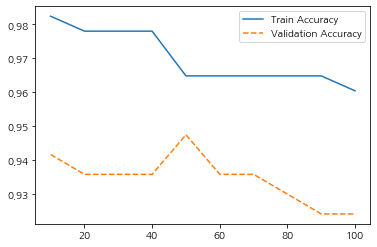

In [19]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

    분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하나 test 데이터의 성능 변화를 고려하면 20에서 70까지는 거의 일정한 점수를 갖고 있고 50에서 정점을 찍어 성능이 좋아 보이지만 그 보다는 40을 선택하는 것이 성능(score)이 어느정도 보장되면서 추후 안정성까지 확보할 수 있을거라 판단.
    따라서 min_samples_split은 40을 선택한다.

In [20]:
min_samples_split=40

##### min_samples_leaf정하기

In [21]:
train_accuracy =[]; test_accuracy=[]

para_leaf = [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=v_min_samples_leaf
                                ,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['Leaf']=para_leaf
df_accuracy_leaf['Train Accuracy']=train_accuracy
df_accuracy_leaf['Validation Accuracy']=test_accuracy

df_accuracy_leaf.round(3)

,Leaf,Train Accuracy,Validation Accuracy
0,10,0.960,0.924
1,20,0.952,0.924
2,30,0.952,0.930
3,40,0.952,0.924
4,50,0.938,0.889
5,60,0.930,0.924
6,70,0.925,0.924
7,80,0.652,0.602
8,90,0.652,0.602
9,100,0.652,0.602


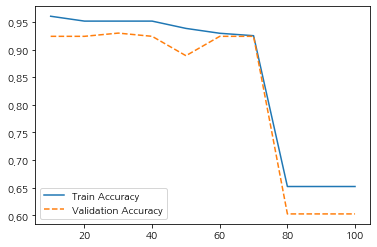

In [22]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

    잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며
    Train/Test 데이터의 성능 변화를 고려하여 20 선택

In [23]:
min_samples_leaf=20

##### 최종 모델 선정

In [24]:
rf_final = RandomForestClassifier(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 0.952
Accuracy on test set : 0.924
Confusion matrix : 
[[101   5]
 [  8  57]]


In [25]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_
df_importance.sort_values("Importance",ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
22,worst perimeter,0.140
7,mean concave points,0.133
20,worst radius,0.121
23,worst area,0.121
6,mean concavity,0.110
0,mean radius,0.097
27,worst concave points,0.083
2,mean perimeter,0.045
13,area error,0.043
3,mean area,0.025


Text(0, 0.5, '설명변수')

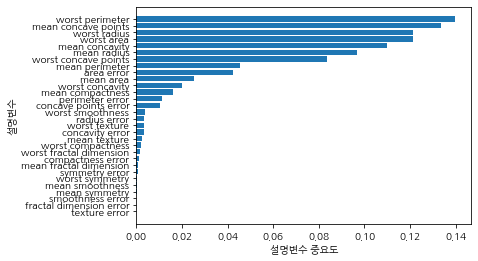

In [26]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("설명변수 중요도")
plt.ylabel('설명변수')

## 결론

train/test 데이터의 정분류율이 비슷한 수준(**92.4%**)으로 안정적인 모델임을 확인할 수 있음


중요 설명변수 : worst preimeter, mean concave points, worst radius, worst area 순으로 영향도가 크다고 해석가능하다.

|confusion matrix|예측(0)|예측(1)|
|---|---|---|
|**실제(0)**|TN(True Negative)|FP(False Positive)|
|**실제(1)**|FN(False Negative)|TP(True Positive)|


confusion matrix를 통해 우리가 주목하고 있는 0(Malignant)가 얼마나 정확하게 분류되었는지 확인해보면 test 데이터의 전체 malignant 개수 106개 중 5개의 오분류가 발생하였으므로 5/106 = 0.047 즉, 4.7%의 오분류율이 나타난다.
    **95%의 정확도**를 가진 모델이라고 해석 가능하다

# 2) 서포트 벡터 머신(SVM)

**SCALE** 변환

In [27]:
v_feature_name=df_raw_x.columns

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


    Standard Scale로 변환후 데이터 나누기
    Train : Valid : Test = 4 : 3 : 3

In [28]:
# test와 (valid, train)
df_temp_x, df_test_x, df_temp_y, df_test_y = train_test_split(df_scaled, df_raw_y, test_size=0.3, random_state=1220)

# valid, train
df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(df_temp_x, df_temp_y, test_size=3/7, random_state=926)


print("train size is {}".format(df_train_x.shape))
print("train y size is {}".format(df_train_y.shape))
print("valid size is {}".format(df_valid_x.shape))
print("valid y size is {}".format(df_valid_y.shape))
print("test size is {}".format(df_test_x.shape))
print("test y size is {}".format(df_test_y.shape))


train size is (227, 30)
train y size is (227,)
valid size is (171, 30)
valid y size is (171,)
test size is (171, 30)
test y size is (171,)


### Default Classifier 생성

In [29]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_train_x, df_train_y)

print("Accuracy on training set :{:.3f}".format(svm_scaled.score(df_train_x, df_train_y)))
print("Accuracy on validation set :{:.3f}".format(svm_scaled.score(df_valid_x, df_valid_y)))

Accuracy on training set :0.978
Accuracy on validation set :0.942


C : 규제에 대한 강도 변경

In [30]:
train_accuracy=[]; test_accuracy=[]
para_c = [10**c for c in range(-2,2)]

for v_C in para_c:
    svm=SVC(C=v_C, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_valid_x, df_valid_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['Train Accuracy']=train_accuracy
df_accuracy_c['Validation Accuracy']=test_accuracy

df_accuracy_c.round(3)

,C,Train Accuracy,Validation Accuracy
0,0.01,0.652,0.602
1,0.10,0.960,0.912
2,1.00,0.978,0.942
3,10.00,0.996,0.953


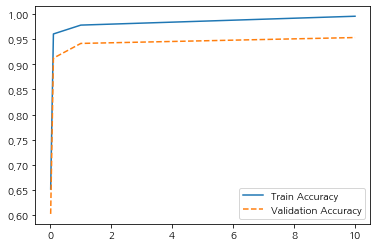

In [31]:
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

C가 0.1 일때, 모델의 정확도가 많이 증가함

In [32]:
C=0.1

##### Gamma : 훈련 샘플이 미치는 영향의 범위를 변경

In [33]:
train_accuracy =[]; test_accuracy=[]

para_gamma = [gamma*0.1 for gamma in range(1,10)]

for v_gamma in para_gamma:
    svm=SVC(C=C,gamma=v_gamma, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_valid_x, df_valid_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['Gamma']=para_gamma
df_accuracy_gamma['Train Accuracy']=train_accuracy
df_accuracy_gamma['Validation Accuracy']=test_accuracy

df_accuracy_gamma.round(3)

,Gamma,Train Accuracy,Validation Accuracy
0,0.1,0.850,0.754
1,0.2,0.652,0.602
2,0.3,0.652,0.602
3,0.4,0.652,0.602
4,0.5,0.652,0.602
5,0.6,0.652,0.602
6,0.7,0.652,0.602
7,0.8,0.652,0.602
8,0.9,0.652,0.602


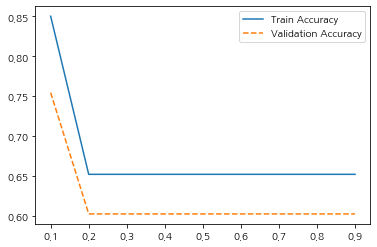

In [34]:
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

    0.1을 기점으로 score가 상당히 많이 감소하는 것을 확인하였다.
    정확하게 점수가 떨어지는 지점을 찾기 위해 위 과정을 다시한번 실행하겠다.

In [35]:
train_accuracy =[]; test_accuracy=[]

para_gamma = [gamma*0.01 for gamma in range(1,100,3)]

for v_gamma in para_gamma:
    svm=SVC(C=C,gamma=v_gamma, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_valid_x, df_valid_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['Gamma']=para_gamma
df_accuracy_gamma['Train Accuracy']=train_accuracy
df_accuracy_gamma['Validation Accuracy']=test_accuracy

df_accuracy_gamma.round(3)

,Gamma,Train Accuracy,Validation Accuracy
0,0.01,0.956,0.883
1,0.04,0.960,0.912
2,0.07,0.965,0.918
3,0.10,0.850,0.754
4,0.13,0.714,0.632
5,0.16,0.656,0.608
6,0.19,0.652,0.602
7,0.22,0.652,0.602
8,0.25,0.652,0.602
9,0.28,0.652,0.602


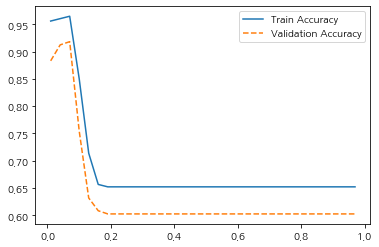

In [36]:
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

    gamma가 0.2이상일때는 정확도에 변화가 존재하지 않는다.
    gamma는 0.07일때 피크를 찍고 정확도가 감소하므로 gamma를 0.07로 선택

In [37]:
gamma=0.07

**final model**

In [38]:
svm_final = SVC(gamma=gamma, C=C,random_state=1234)
svm_final.fit(df_train_x, df_train_y)

y_pred=svm_final.predict(df_test_x)

print("Accuracy on training set :{:.3f}".format(svm_final.score(df_train_x, df_train_y)))
print("Accuracy on test set :{:.3f}".format(svm_final.score(df_test_x, df_test_y)))
print("Confusion Matrix :\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set :0.965
Accuracy on test set :0.947
Confusion Matrix :
[[106   0]
 [  9  56]]


## 결론

train/test 데이터의 정분류율이 비슷한 수준(**94.7%**)으로 안정적인 모델임을 확인할 수 있음


|confusion matrix|예측(0)|예측(1)|
|---|---|---|
|**실제(0)**|TN(True Negative)|FP(False Positive)|
|**실제(1)**|FN(False Negative)|TP(True Positive)|


confusion matrix를 통해 우리가 주목하고 있는 0(Malignant)가 얼마나 정확하게 분류되었는지 확인해보면 test 데이터의 전체 malignant 개수 106개 중 0개의 오분류가 발생하였으므로 현재 존재하는 데이터에 대해서는**100%의 정확도**를 가진 모델이라고 해석 가능하다

# 3) KNN(K-nearlest Neighbors)

<span style="color:red">SVM에서 스케일 변환한 데이터를 가지고 모델을 생성했습니다.</span>

### Default Classifier 생성

In [39]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
print('Accuracy on training set:{:.3f}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set:{:.3f}'.format(knn_uncustomized.score(df_test_x, df_test_y)))### Default Classifier 생성

Accuracy on training set:0.978
Accuracy on test set:0.965


### K(이웃 수)의 개수 정하기

In [40]:
train_accuracy=[]; test_accuracy=[]

para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_valid_x, df_valid_y))
    
df_accuracy_neighbors=pd.DataFrame()
df_accuracy_neighbors['Neighbors']=para_n_neighbors
df_accuracy_neighbors['Train Accuracy']=train_accuracy
df_accuracy_neighbors['Validation Accuracy']=test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,Train Accuracy,Validation Accuracy
0,1,1.000,0.936
1,2,0.960,0.901
2,3,0.969,0.936
3,4,0.965,0.924
4,5,0.978,0.947
5,6,0.960,0.936
6,7,0.969,0.942
7,8,0.960,0.924
8,9,0.965,0.930
9,10,0.960,0.918


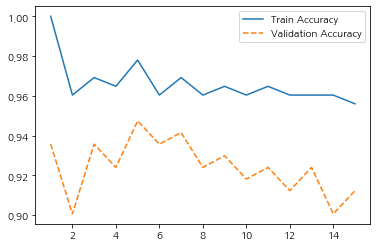

In [41]:
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

이 데이터의 경우 군집의 개수에 따라 정확도의 변동이 심하다. 하지만 군집이 5개가 될때 Train 정확도는 0.97, valid 정확도는 0.94로 다른 정확도에 비해 높은 값을 갖고, train과 valid의 점수 차이가 적으므로 여기서는 5를 선택하겠다.

In [42]:
n_neighbors=5

**가중치별 이웃 수 증가에 다른 정확도 변호ㅏ**

In [43]:
train_accuracy=[];test_accuracy=[]

para_n_neighbors= [i for i in range(1,11)]*3
para_metric= ['minkowski']*10+['euclidean']*10 + ['manhattan']* 10
for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors, metric= v_metric, weights='uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_valid_x, df_valid_y))

df_accuracy_metric= pd.DataFrame()
df_accuracy_metric['Neighbors']=para_n_neighbors
df_accuracy_metric['Metric']=para_metric
df_accuracy_metric['TrainAccuracy']=train_accuracy
df_accuracy_metric['TestAccuracy']=test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.936
1,2,minkowski,0.960,0.901
2,3,minkowski,0.969,0.936
3,4,minkowski,0.965,0.924
4,5,minkowski,0.978,0.947
5,6,minkowski,0.960,0.936
6,7,minkowski,0.969,0.942
7,8,minkowski,0.960,0.924
8,9,minkowski,0.965,0.930
9,10,minkowski,0.960,0.918


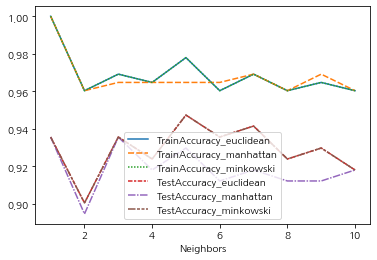

In [44]:
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index='Neighbors', columns='Metric', values=['TrainAccuracy', "TestAccuracy"])
level0= df_accuracy_metric_pivot.columns.get_level_values(0)
level1= df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+'_'+level1
sns.lineplot(data= df_accuracy_metric_pivot)
plt.legend(loc='best')


manhattan의 경우 가장 일정한 값을 보여주지만 euclidean을 선택한다.

In [45]:
metric="euclidean"

**final model**

In [46]:
knn_model= KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform', metric=metric)

knn_model.fit(df_train_x, df_train_y)

y_pred= knn_model.predict(df_test_x)
print('train data accuracy:{:.3f}'.format(knn_model.score(df_train_x, df_train_y)))
print('test data accuracy:{:.3f}'.format(knn_model.score(df_test_x, df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y, y_pred)))

train data accuracy:0.978
test data accuracy:0.965
Confusion matrix:
[[106   0]
 [  6  59]]


## 결론

train/test 데이터의 정분류율이 비슷한 수준(**96.5%**)으로 안정적인 모델임을 확인할 수 있음


|confusion matrix|예측(0)|예측(1)|
|---|---|---|
|**실제(0)**|TN(True Negative)|FP(False Positive)|
|**실제(1)**|FN(False Negative)|TP(True Positive)|


confusion matrix를 통해 우리가 주목하고 있는 0(Malignant)가 얼마나 정확하게 분류되었는지 확인해보면 test 데이터의 전체 malignant 개수 106개 중 0개의 오분류가 발생하였으므로 현재 존재하는 데이터에 대해서는**100%의 정확도**를 가진 모델이라고 해석 가능하다

# 최종결론

RandomForest 모델을 제외하고 KNN과 SVM의 오분류율은 0였으며, 왜 그런지에 대해 생각한 점을 적어보자면, 유방암을 유발시키는 feature들은 다른 주제들에 비해 서로의 연관성이 높기 때문에 **거리기반** 모델에서의 성
능이 좋은 것으로 생각하였습니다.  

단순히 accuracy와 confusion matrix의 결과만을 신뢰할 수는 없지만 **양성**으로 판정된 환자들에게는 다시 한번 검사를 받게 유도하는 방법을 사용한다면 오진을 내릴 확률을 더 낮출 수 있을거라 생각됩니다.